In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read images and showing their magnitude in freq domain

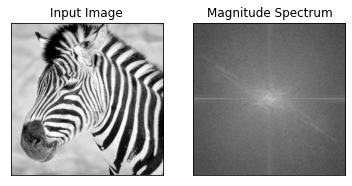

In [5]:
img1 = cv2.imread('zebra.png',0)
img2 = cv2.imread('cheetah.png',0)



img_float1 = np.float32(img1)
img_float2 = np.float32(img2)

dft1 = cv2.dft(img_float1, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift1 = np.fft.fftshift(dft1)

dft2 = cv2.dft(img_float2, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft2)

magnitude_spectrum1 = 20*np.log(cv2.magnitude(dft_shift1[:,:,0],dft_shift1[:,:,1]))
magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift2[:,:,0],dft_shift2[:,:,1]))
phase=np.angle(dft1)


plt.subplot(121),plt.imshow(img1, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show() 

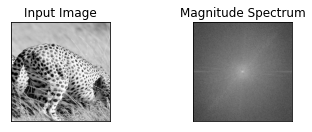

In [5]:
plt.subplot(221),plt.imshow(img2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show() 

# Normal process of returning to card 

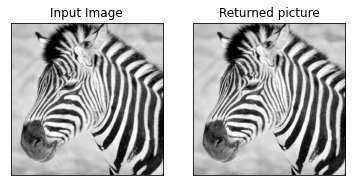

In [19]:
fshift = dft_shift1
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img1, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Returned picture'), plt.xticks([]), plt.yticks([])

plt.show()

# Swapping the phases

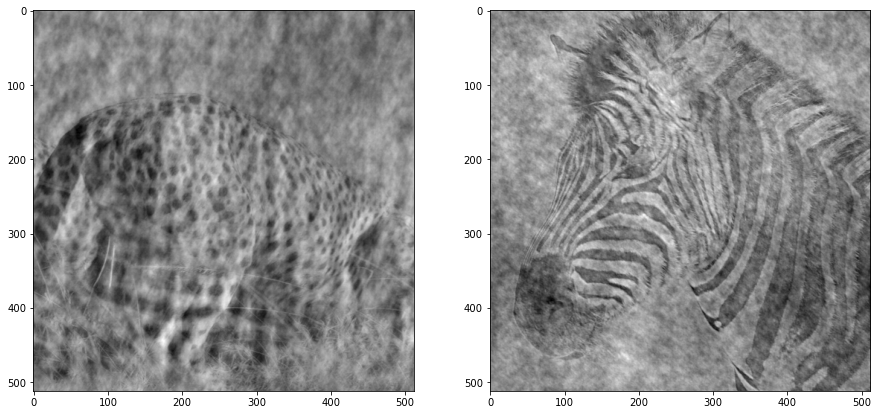

In [24]:


#Fourier Transform wih numpy
Image1_FFT=np.fft.fft2(img_float1);
Image2_FFT=np.fft.fft2(img_float2);

# Get the magnitudes and phase responses handling the complex numbers
mag1 = abs(Image1_FFT);
mag2 = abs(Image2_FFT);
pha1 = np.angle(Image1_FFT);
pha2 = np.angle(Image2_FFT);

#Calculate new frequencies by swapping the phases
out1 = mag1 * np.exp(1j*pha2);
out2 = mag2 * np.exp(1j*pha1);

# Find the inverse images with numpy
out1 = np.real(np.fft.ifft2(out1));
out2 = np.real(np.fft.ifft2(out2));

# Show the results
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.imshow(out1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(out2, cmap='gray')
plt.show()

# Rafael Andrade , José Luis Lobera and José Miguel de la Mora